In [1]:
# Load packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shaoqiantang/movie-data-analysis/master/movie.csv', encoding = 'iso-8859-1')
data.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [3]:
from ggplot import *

In [4]:
# convert object to float data
object_cols = ['Gross_rev', 'Overseas_rev', 'Profit','Adjusted_Gross']
for col in object_cols:
    data[col] = data[col].str.replace(',','')
    data[col] = pd.to_numeric(data[col])
data.dtypes

Day_of_Week          object
Director             object
Genre                object
Movie_Title          object
Release_Date         object
Studio               object
Adjusted_Gross      float64
Budget              float64
Gross_rev           float64
IMDb_Rating         float64
MovieLens_Rating    float64
Overseas_rev        float64
Overseas_Perc       float64
Profit              float64
Profit_perc         float64
Runtime_min           int64
US_rev              float64
US_perc             float64
dtype: object

In [5]:
# Apply K_Means
k_means = KMeans(n_clusters = 3)

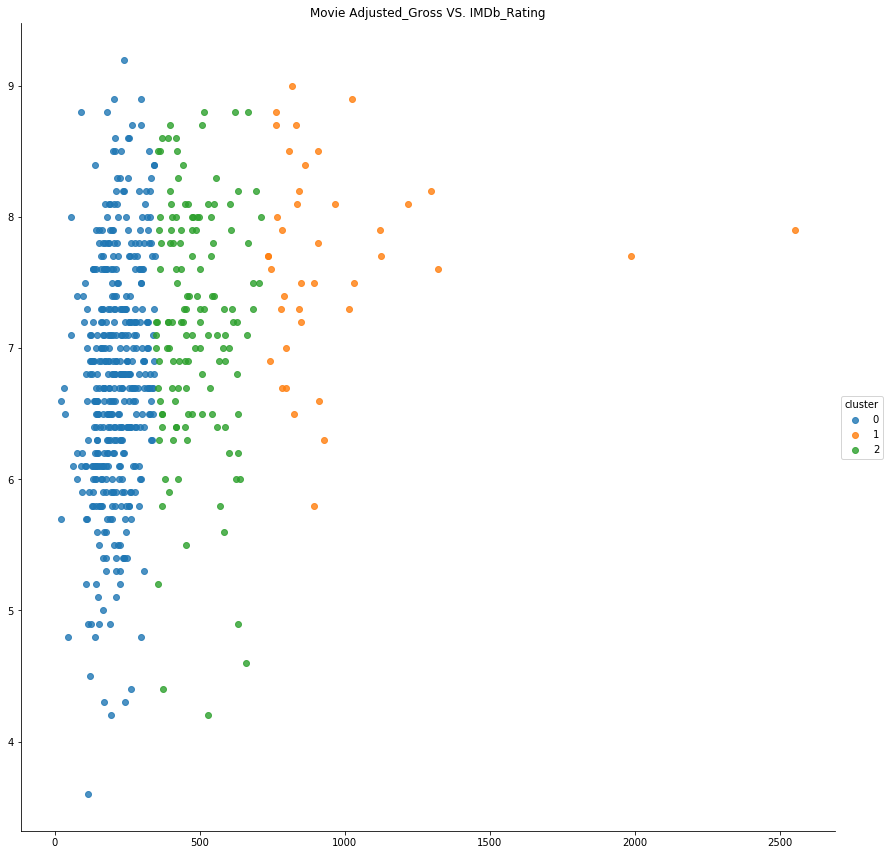

In [6]:
cluster_source = data.loc[:,["Profit", "IMDb_Rating"]]
kmeans = k_means.fit(cluster_source)
data['cluster'] = kmeans.labels_
ax = sns.lmplot(x="Profit", y="IMDb_Rating", data=data,hue="cluster", size=12, fit_reg=False)
ax.set(xlabel='', ylabel='', title="Movie Adjusted_Gross VS. IMDb_Rating")

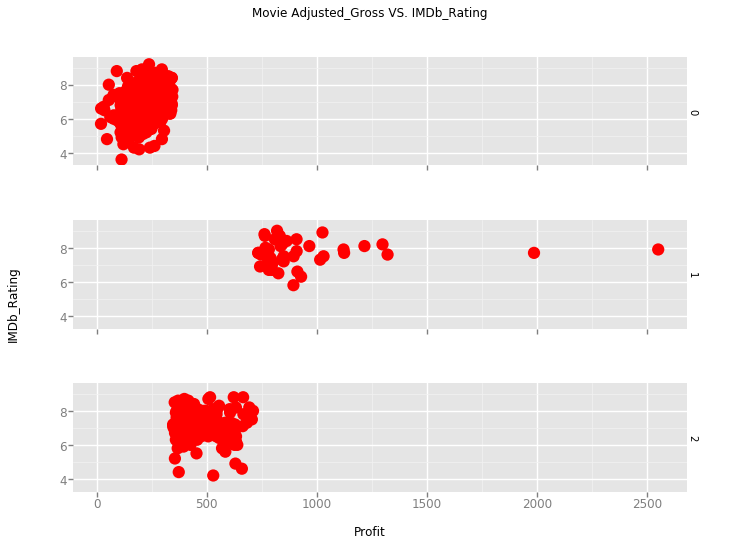

<ggplot: (-9223372036559762274)>

In [7]:
# Facet plot Kmeans
keans_plot = ggplot(data,aes(x = "Profit", y="IMDb_Rating")) + geom_point(size=150, color = 'red') + facet_grid('cluster')
keans_plot + xlab("") + ylab("") + ggtitle("Movie Adjusted_Gross VS. IMDb_Rating")

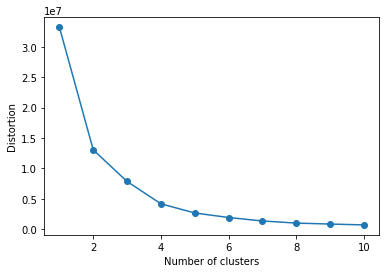

In [8]:
# Elbow method: k = 4 is better
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(cluster_source)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

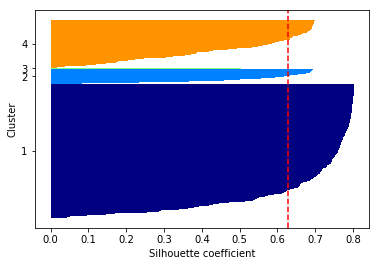

In [9]:
# silhouette plot
km = KMeans(n_clusters = 4,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(cluster_source)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(cluster_source,
                                     y_km,
                                     metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color = 'red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()